In [1]:
import pandas as pd
import allel
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_merge = pd.read_csv('../analysis_files/df_merged.csv')

In [3]:
print(df_merge)

                                           Unnamed: 0         tool  threshold  \
0                                                   0    BioGraph*       10.0   
1                                                   1    BioGraph*      100.0   
2                                                   2    BioGraph*     1000.0   
3                                                   3    BioGraph*    10000.0   
4                                                   4  breakdancer       10.0   
5                                                   5  breakdancer      100.0   
6                                                   6  breakdancer     1000.0   
7                                                   7  breakdancer    10000.0   
8                                                   8       clever       10.0   
9                                                   9       clever      100.0   
10                                                 10       clever     1000.0   
11                          

# Figure 3a - Sensitivity

/home/vs/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


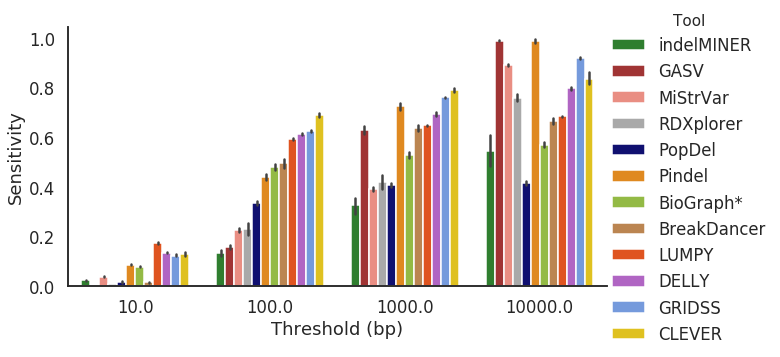

In [4]:
%store -r
fig2a=sns.set_style("white")
fig2a=sns.set_context("talk")

fig_order = ["indelminer","gasv","mistrvar","rdxplorer","popdel","pindel","BioGraph*","breakdancer","smoove","delly","gridss","clever"]
labels    = ["indelMINER","GASV","MiStrVar","RDXplorer","PopDel","Pindel","BioGraph*","BreakDancer","LUMPY","DELLY","GRIDSS","CLEVER"]
df_merge["Tool"] = df_merge["tool"].map(dict(zip(fig_order, labels)))

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2a = sns.catplot(x="threshold", y="sensitivity", kind="bar",errwidth=2.5,data = df_merge,hue="Tool",aspect=1.8, palette=pal,hue_order=labels)
fig2a.set(xlabel='Threshold (bp)', ylabel='Sensitivity')
fig2a=sns.despine()
plt.xticks(rotation=0)
#plt.show(fig2a)

plt.savefig("../figures/fig3/fig3a", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3a.pdf", bbox_inches='tight')

# Figure 3b - Precision

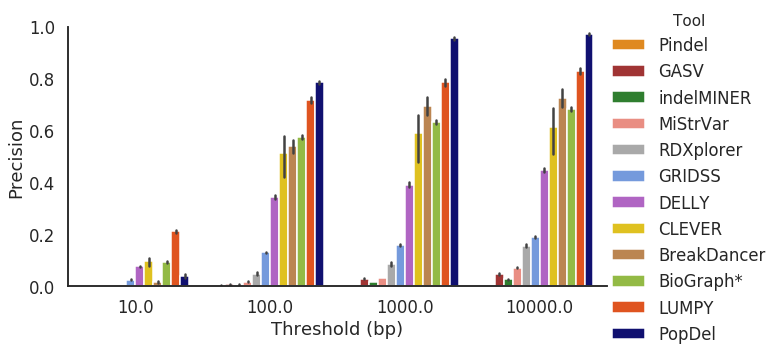

In [5]:
%store -r
fig2b=sns.set_style("white")
fig2b=sns.set_context("talk")
fig_order = ['pindel','gasv','indelminer',
             'mistrvar','rdxplorer','gridss',
            'delly','clever',
            'breakdancer','BioGraph*','smoove','popdel']
labels = ['Pindel','GASV','indelMINER',
             'MiStrVar','RDXplorer','GRIDSS',
            'DELLY','CLEVER',
            'BreakDancer','BioGraph*','LUMPY','PopDel']

pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2b = sns.catplot(x="threshold", y="precision", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
plt.ylim(0, 1)
fig2b.set(xlabel='Threshold (bp)', ylabel='Precision')
fig2b=sns.despine()
#plt.show(fig2b)

plt.savefig("../figures/fig3/fig3b", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3b.pdf", bbox_inches='tight')

# Figure 3c - Specificity

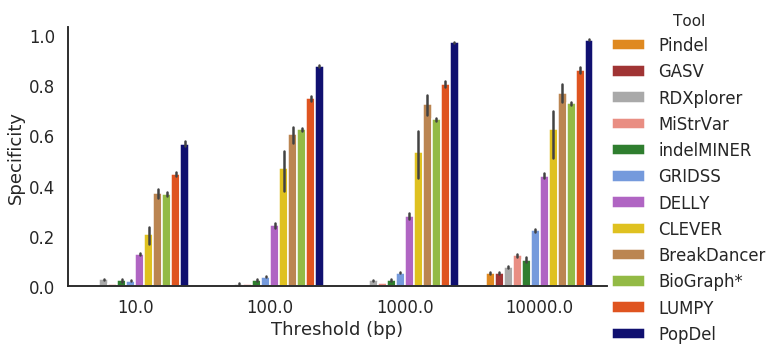

In [6]:
%store -r
fig2c=sns.set_style("white")
fig2c=sns.set_context("talk")

fig_order = ["pindel","gasv","rdxplorer","mistrvar","indelminer","gridss","delly","clever","breakdancer","BioGraph*","smoove","popdel"]
labels = ["Pindel","GASV","RDXplorer","MiStrVar","indelMINER","GRIDSS","DELLY","CLEVER","BreakDancer","BioGraph*","LUMPY","PopDel"]

pal = []
for tool in fig_order:
    pal.append(color_map[tool])


fig2c = sns.catplot(x="threshold", y="specificity", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
fig2c.set(xlabel='Threshold (bp)', ylabel='Specificity')
fig2c=sns.despine()
#plt.show(fig2c)

plt.savefig("../figures/fig3/fig3c", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3c.pdf", bbox_inches='tight')

# Figure 3d - F-score

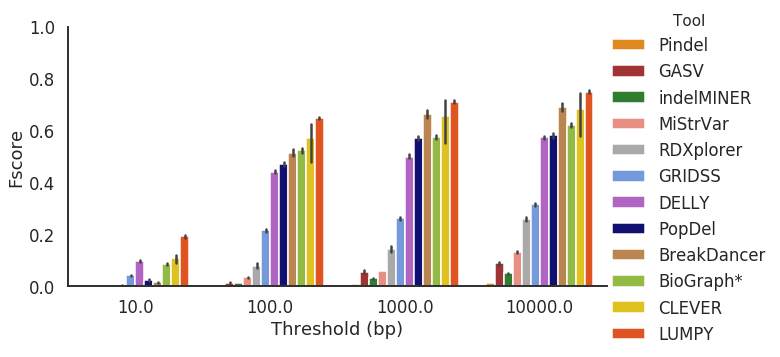

In [7]:
%store -r
fig2d=sns.set_style("white")
fig2d=sns.set_context("talk")

fig_order = ["pindel","gasv","indelminer","mistrvar","rdxplorer","gridss","delly","popdel","breakdancer","BioGraph*","clever","smoove"]

labels = ["Pindel","GASV","indelMINER","MiStrVar","RDXplorer","GRIDSS","DELLY","PopDel","BreakDancer","BioGraph*","CLEVER","LUMPY"]
pal = []
for tool in fig_order:
    pal.append(color_map[tool])

fig2d = sns.catplot(x="threshold", y="f-score", kind="bar",errwidth=2.5,data = df_merge,hue='Tool',aspect=1.8, palette=pal,hue_order=labels)
fig2d.set(xlabel='Threshold (bp)', ylabel='Fscore')
fig2d=sns.despine()
plt.ylim(0, 1)
#plt.show(fig2d)

plt.savefig("../figures/fig3/fig3d", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3d.pdf", bbox_inches='tight')

In [4]:
df_mean=df_merge.groupby(['tool','threshold'],as_index=False).mean()
df_mean.head()

,tool,threshold,nTP,nFP,nTN,n_true,nFN,sensitivity,precision,specificity,f-score
0,BioGraph*,10.0,42.923077,412.846154,241.384615,545.692308,502.769231,0.078808,0.094471,0.368844,0.085901
1,BioGraph*,100.0,261.923077,193.846154,323.769231,545.692308,283.769231,0.480231,0.575378,0.625969,0.523341
2,BioGraph*,1000.0,287.615385,168.153846,335.615385,545.692308,258.076923,0.527023,0.631422,0.666503,0.574327
3,BioGraph*,10000.0,310.384615,145.384615,391.307692,545.692308,235.307692,0.568842,0.681724,0.729466,0.619981
4,breakdancer,10.0,8.230769,495.461538,292.230769,545.692308,537.461538,0.015247,0.016396,0.371803,0.015748


# Figure 3e

In [5]:
color_map1 = {'BioGraph*':'yellowgreen', 'BreakDancer':'peru', 'CLEVER':'gold', 'DELLY':'darkorange', 'DELLY':'mediumorchid', 
             'GASV':'firebrick', 'GRIDSS':'cornflowerblue', 'indelMINER':'forestgreen', 
             'MiStrVar':'salmon', 'Pindel':'darkorange', 'PopDel':'navy', 'RDXplorer':'darkgray', 
             'LUMPY':'orangered', 'true deletions':'black'}

In [6]:
fig_order = ["pindel","gasv","indelminer","mistrvar","rdxplorer","gridss","delly","popdel","breakdancer","BioGraph*","clever","smoove"]
labels = ["Pindel","GASV","indelMINER","MiStrVar","RDXplorer","GRIDSS","DELLY","PopDel","BreakDancer","BioGraph*","CLEVER","LUMPY"]
df_mean["Tool"] = df_mean["tool"].map(dict(zip(fig_order, labels)))

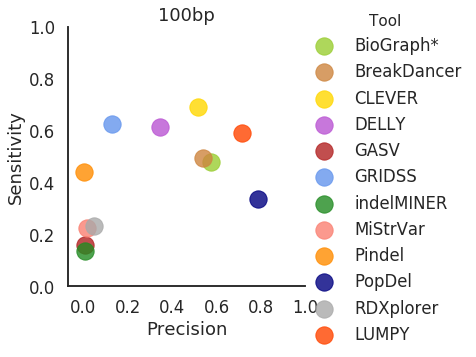

In [15]:
import matplotlib.pyplot as plt
import numpy as np
for th in [100]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='sensitivity', hue='Tool',fit_reg=False,aspect=1,scatter_kws={"s": 300}, palette=color_map1)
    g.set(xlabel='Precision', ylabel='Sensitivity')
    plt.title(str(th)+"bp")
#     g=plt.xlim(-0.1, 1)
    ticks=[0,0.2,0.4,0.6,0.8,1]
    g.ax.set_xticks(ticks)
    g.ax.set_yticks(ticks)
#     g=plt.ylim(-0.1, 1)
#     g=sns.despine()
plt.savefig("../figures/fig3/fig3e.pdf", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3e", bbox_inches='tight')

# Figure 3f

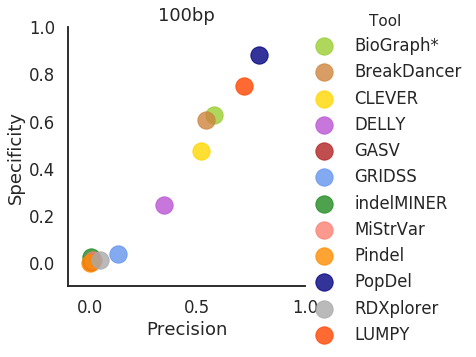

In [21]:
for th in [100]:
    g=sns.set_style("white")
    g=sns.set_context("talk")
    
    g=sns.lmplot(data=df_mean.loc[df_mean['threshold'] == th], x='precision', y='specificity', hue='Tool',fit_reg=False,aspect=1,scatter_kws={"s": 300}, palette=color_map1)
    g.set(xlabel='Precision', ylabel='Specificity')
    plt.title(str(th)+"bp")
    g=plt.xlim(-0.1, 1)
    g=plt.ylim(-0.1, 1)
    g=sns.despine()
plt.savefig("../figures/fig3/fig3f.pdf", bbox_inches='tight')
plt.savefig("../figures/fig3/fig3f", bbox_inches='tight')